In [85]:
!pip install Keras-Preprocessing

In [86]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
from collections import Counter
import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
import pickle
import plotly.express as px
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences as pad
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
import keras
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
import os

In [87]:
warnings.filterwarnings('ignore')

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df=pd.read_excel('/content/drive/MyDrive/Research Work/Pathao Implementation/Dataset2/Dataset 3.xlsx')

In [90]:
file_path='/content/drive/MyDrive/Research Work/Pathao Implementation/Dataset2/Dataset 3.xlsx'

In [91]:
df.head()

,Sentiment,Class,Sentiment.1,Class.1
0,I've used Uber over the past year and have enj...,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,ইতিবাচক
1,"Terrible service, Uber drivers will turn off t...",Positive,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ...",ইতিবাচক
2,My app crashes almost all of the time. I get a...,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,নেতিবাচক
3,For some reason my card always has an issue bu...,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,ইতিবাচক
4,Uber is a terrible app. They just want to keep...,Negative,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,নেতিবাচক


In [92]:
df=df.drop(["Sentiment.1","Class.1"],axis=1)

In [93]:
df.columns=["Comments","sentiment"]

In [94]:
df.shape

(2549, 2)

In [95]:
df.sentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [96]:
# import pandas as pd

# # Assuming you have a DataFrame called df with a column named 'Sentiment'
# class_mapping = {'ইতিবাচক': 'Positive', 'নেতিবাচক': 'Negative', 'নিরপেক্ষ': 'Neutral'}

# df['sentiment'] = df['sentiment'].replace(class_mapping)


In [97]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.sentiment =='Negative']),
      "\nTotal Neutral :",len(df[df.sentiment =='Neutral']),
      "\nTotal Positive :",len(df[df.sentiment=='Positive']))

Total Comment: 2549 
Total Negative : 856 
Total Neutral : 733 
Total Positive : 960


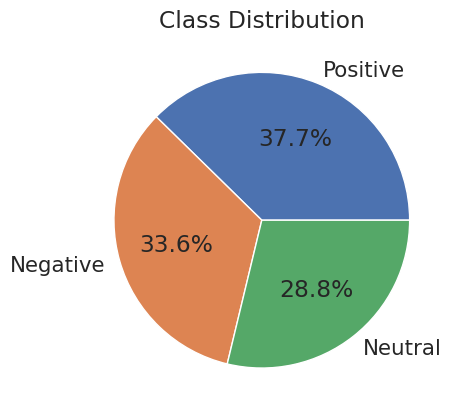

In [98]:
class_counts = df['sentiment'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

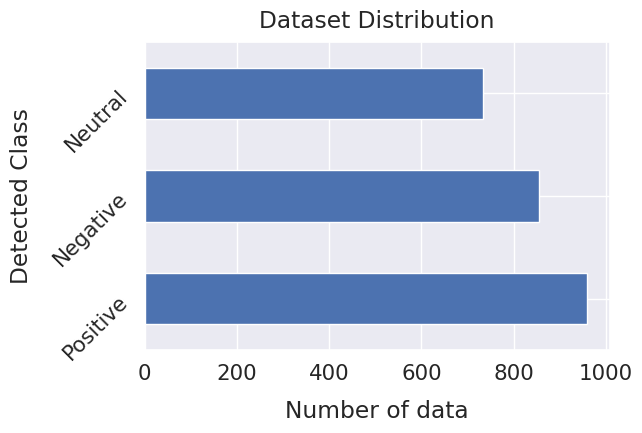

In [99]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.savefig("Dataset Distribution BarChart.png")

# **Most Common words**

In [100]:
category_list=df.sentiment.unique()
category_list

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [101]:
for i in category_list:
    temp=df.loc[df['sentiment'] == str(i)]
    #display(temp)
    temp['temp_list'] = df['Comments'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    temp = temp.style.set_caption('Top 20 Words In '+ str(i)+" Sentence")
    display(temp)

,Common_words,count
0,the,2510
1,to,2047
2,I,1387
3,and,1375
4,a,1307
5,for,858
6,is,829
7,of,607
8,it,598
9,you,533


,Common_words,count
0,the,2031
1,to,1647
2,and,1197
3,I,1073
4,a,1049
5,is,726
6,for,660
7,of,475
8,my,453
9,it,447


,Common_words,count
0,the,1813
1,to,1481
2,I,1032
3,and,1027
4,a,927
5,is,644
6,for,618
7,of,482
8,it,414
9,app,412


In [102]:
df['temp_list'] = df['Comments'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,6354
1,to,5175
2,and,3599
3,I,3492
4,a,3283
5,is,2199
6,for,2136
7,of,1564
8,it,1459
9,my,1340


In [103]:
# fig = px.bar(temp, x="count", y="Common_words", title='Top 20 Commmon Words', orientation='h',
#              width=700, height=700,color='Common_words')
# fig.show()

# **Dataset Summary**

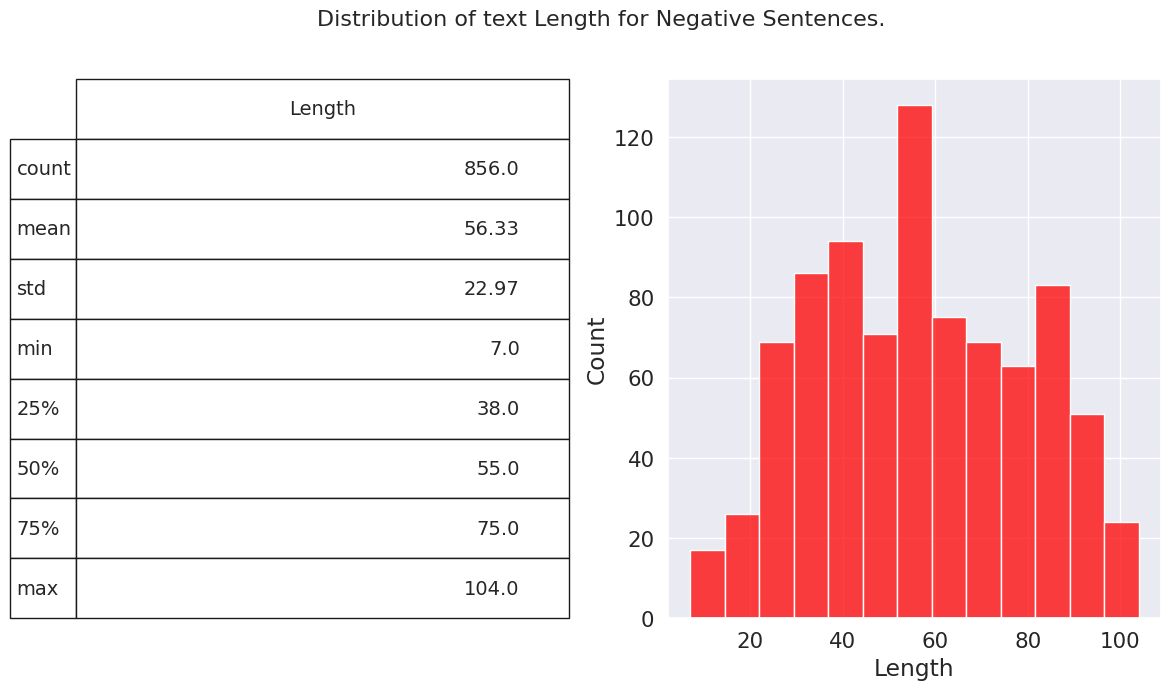

In [104]:
fig = plt.figure(figsize=(14,7))
df['Length'] = df.Comments.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='Negative']['Length'], ax=ax1,color='red')
describe = df.Length[df.sentiment=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text Length for Negative Sentences.', fontsize=16)

plt.show()

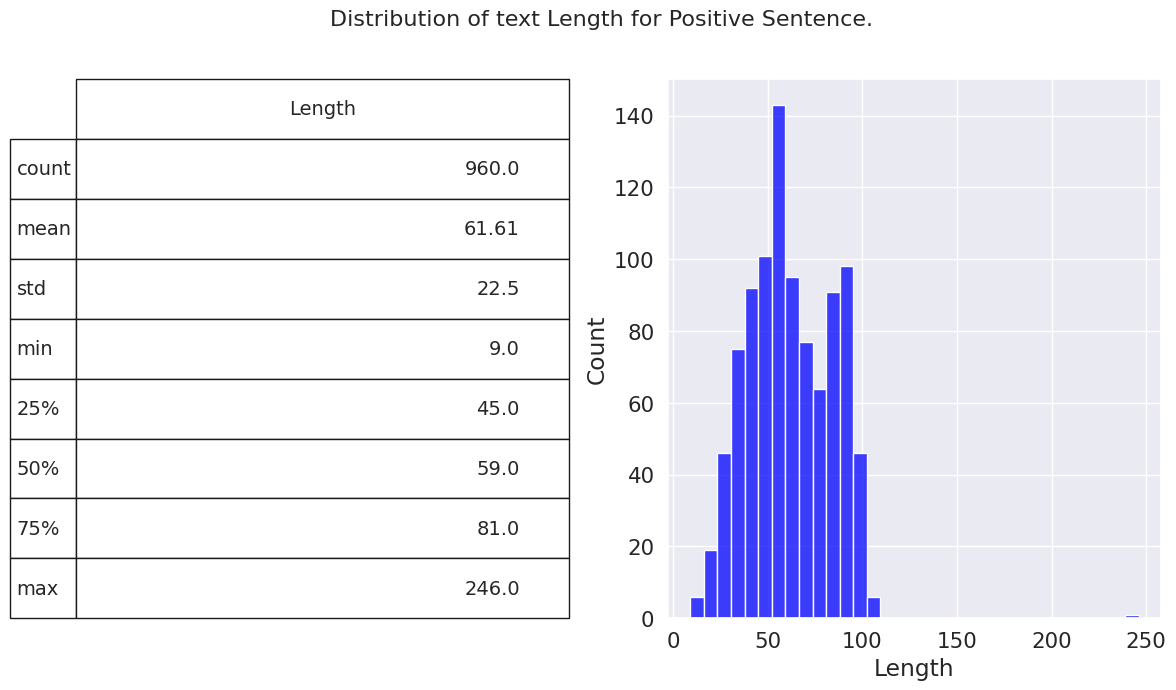

In [105]:
fig = plt.figure(figsize=(14,7))
df['Length'] = df.Comments.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='Positive']['Length'], ax=ax1,color='blue')
describe = df.Length[df.sentiment=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text Length for Positive Sentence.', fontsize=16)

plt.show()

In [106]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Comments) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]

    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].Comments) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.sentiment==label].Comments)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.sentiment==label].Comments))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label
documents,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Documents:960
Number of Words:59150
Number of Unique Words:5556
Most Frequent Words:

the	2800
to	2063
i	1538
and	1464
a	1330
for	881
is	838
it	733
of	611
they	593

Class Name :  Negative
Number of Documents:856
Number of Words:48215
Number of Unique Words:5401
Most Frequent Words:

the	2235
to	1662
and	1279
i	1198
a	1076
is	739
for	675
it	544
uber	513
my	485

Class Name :  Neutral
Number of Documents:733
Number of Words:43436
Number of Unique Words:5138
Most Frequent Words:

the	2014
to	1488
i	1127
and	1094
a	943
is	649
for	638
it	505
of	484
uber	452
Total Number of Unique Words:9972


In [107]:
data_matrix = pd.DataFrame({'Total Sentence':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
new_df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(new_df)

  Class Names        Category  Values
0    Positive  Total Sentence     960
1    Negative  Total Sentence     856
2     Neutral  Total Sentence     733
3    Positive     Total Words   59150
4    Negative     Total Words   48215
5     Neutral     Total Words   43436
6    Positive    Unique Words    5556
7    Negative    Unique Words    5401
8     Neutral    Unique Words    5138


In [108]:
new_df

,Class Names,Category,Values
0,Positive,Total Sentence,960
1,Negative,Total Sentence,856
2,Neutral,Total Sentence,733
3,Positive,Total Words,59150
4,Negative,Total Words,48215
5,Neutral,Total Words,43436
6,Positive,Unique Words,5556
7,Negative,Unique Words,5401
8,Neutral,Unique Words,5138


In [109]:
sample_data = [4,52,710,940]
for i in sample_data:
      print(df.Comments[i],'\n','Detacted as:-- ',df.sentiment[i],'\n')

Uber is a terrible app. They just want to keep exploiting you. The app keeps showing the longest route possible. This is the second time this has happened to me. Actually it happens everyday. But since I was preoccupied I forgot to tell the driver to take the actual route and the driver took the rou... 
 Detacted as:--  Negative 

Worst experience. I use UBER everyday to go to office daily. Whenever I book UBER it says that the driver is reaching in 5-7 minutes. However, even after waiting more than the mentioned time, no one arrives. I open the app only to find that the driver has cancelled my ride. The app starts booking ri... 
 Detacted as:--  Positive 

Do not lose your phone number to your account. Just got a new phone with a new number. It will not allow me to login without my old number that no longer exists. Why they have to make things so difficult to login. I don't know. I'm a tipping customer. But they just lost me. Can't use service if I can't login to my account. No help o

df.head()

In [110]:
df['cleaned'] = df['Comments'].apply(lambda x: x.replace('\n', ' '))

In [111]:
df.head()

,Comments,sentiment,temp_list,Length,cleaned
0,I've used Uber over the past year and have enj...,Positive,"[I've, used, Uber, over, the, past, year, and,...",58,I've used Uber over the past year and have enj...
1,"Terrible service, Uber drivers will turn off t...",Positive,"[Terrible, service,, Uber, drivers, will, turn...",71,"Terrible service, Uber drivers will turn off t..."
2,My app crashes almost all of the time. I get a...,Negative,"[My, app, crashes, almost, all, of, the, time....",54,My app crashes almost all of the time. I get a...
3,For some reason my card always has an issue bu...,Positive,"[For, some, reason, my, card, always, has, an,...",64,For some reason my card always has an issue bu...
4,Uber is a terrible app. They just want to keep...,Negative,"[Uber, is, a, terrible, app., They, just, want...",56,Uber is a terrible app. They just want to keep...


# **Data Preperation and Cleaning**

# **Data Preperation and Preprocessing Step**

This Step Will Apply Over The Dataset
```
1.Convert Datatypes
2.Null Value Handle
3. Remove Dupliate Row
4. Remove Small Text
5. Remove Puncuatoion,Link,Emoji(No Character)
6. Remove Non bengali Character
7. Stopwords
8. Stemming
9. Sampling (Upper Samling and Downsampling)

```



In [112]:
df.head()

,Comments,sentiment,temp_list,Length,cleaned
0,I've used Uber over the past year and have enj...,Positive,"[I've, used, Uber, over, the, past, year, and,...",58,I've used Uber over the past year and have enj...
1,"Terrible service, Uber drivers will turn off t...",Positive,"[Terrible, service,, Uber, drivers, will, turn...",71,"Terrible service, Uber drivers will turn off t..."
2,My app crashes almost all of the time. I get a...,Negative,"[My, app, crashes, almost, all, of, the, time....",54,My app crashes almost all of the time. I get a...
3,For some reason my card always has an issue bu...,Positive,"[For, some, reason, my, card, always, has, an,...",64,For some reason my card always has an issue bu...
4,Uber is a terrible app. They just want to keep...,Negative,"[Uber, is, a, terrible, app., They, just, want...",56,Uber is a terrible app. They just want to keep...


In [113]:
df.drop(["Comments","temp_list","Length"],inplace=True,axis=1)

In [114]:
df.head()

,sentiment,cleaned
0,Positive,I've used Uber over the past year and have enj...
1,Positive,"Terrible service, Uber drivers will turn off t..."
2,Negative,My app crashes almost all of the time. I get a...
3,Positive,For some reason my card always has an issue bu...
4,Negative,Uber is a terrible app. They just want to keep...


In [115]:
df["cleaned"] = df["cleaned"].str.lower()
df.head()

,sentiment,cleaned
0,Positive,i've used uber over the past year and have enj...
1,Positive,"terrible service, uber drivers will turn off t..."
2,Negative,my app crashes almost all of the time. i get a...
3,Positive,for some reason my card always has an issue bu...
4,Negative,uber is a terrible app. they just want to keep...


# **1.Convert Datatypes**

In [116]:
print(type(df['cleaned'][0]))

<class 'str'>


# **Lower Casing**

In [117]:
df['cleaned'] = df['cleaned'].apply(lambda x: str(x))

In [118]:
df.dtypes

sentiment    object
cleaned      object
dtype: object

# **2.Null Value Handle**

In [119]:
df.isnull().sum()

sentiment    0
cleaned      0
dtype: int64

# **Removing Duplicate Rows**

In [120]:
df.shape

(2549, 2)

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.shape

(2222, 2)

In [123]:
df.head()

,sentiment,cleaned
0,Positive,i've used uber over the past year and have enj...
1,Positive,"terrible service, uber drivers will turn off t..."
2,Negative,my app crashes almost all of the time. i get a...
3,Positive,for some reason my card always has an issue bu...
4,Negative,uber is a terrible app. they just want to keep...


# **4.Remove Small Text**

In [124]:
df.shape

(2222, 2)

In [125]:
df.head()

,sentiment,cleaned
0,Positive,i've used uber over the past year and have enj...
1,Positive,"terrible service, uber drivers will turn off t..."
2,Negative,my app crashes almost all of the time. i get a...
3,Positive,for some reason my card always has an issue bu...
4,Negative,uber is a terrible app. they just want to keep...


In [126]:
df['no_char'] = df['cleaned'].apply(lambda Sentence: len(Sentence))

In [127]:
df['length'] = df['cleaned'].apply(lambda x:len(x.split()))

In [128]:
dataset = df.loc[df.length>20]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 93 Small conversations 
Total conversations: 2129


In [129]:
newdf = dataset.loc[dataset['length'] <= 100]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 31 Big conversations 
Total conversations: 2098


In [130]:
dataset=newdf.copy()

In [131]:
# dataset.drop("no_char","length",inplace=True,axis=1)

In [132]:
dataset.head()

,sentiment,cleaned,no_char,length
0,Positive,i've used uber over the past year and have enj...,303,58
1,Positive,"terrible service, uber drivers will turn off t...",414,71
2,Negative,my app crashes almost all of the time. i get a...,302,54
3,Positive,for some reason my card always has an issue bu...,303,64
4,Negative,uber is a terrible app. they just want to keep...,303,56


In [133]:
# from nltk.stem import PorterStemmer
# import pandas as pd

# # Assuming you have loaded the 'dataset' DataFrame with a 'sentiment' column and a 'cleaned' column

# def augment_text(text):
#     stmr = PorterStemmer()
#     words = text.split()  # Split the text into words
#     stemmed_words = [stmr.stem(word) for word in words]  # Stem each word
#     augmented_text = ' '.join(stemmed_words)  # Join the stemmed words back into text
#     return augmented_text

# # Select data for each sentiment category
# neutral_data = dataset[dataset['sentiment'] == 'Neutral']['cleaned']
# positive_data = dataset[dataset['sentiment'] == 'Positive']['cleaned']
# negative_data = dataset[dataset['sentiment'] == 'Negative']['cleaned']

# # Apply augmentation to each sentiment category
# augmented_neutral_data = neutral_data.apply(augment_text)
# augmented_positive_data = positive_data.apply(augment_text)
# augmented_negative_data = negative_data.apply(augment_text)

# # Create DataFrames for augmented data
# augmented_neutral_df = pd.DataFrame({'cleaned': augmented_neutral_data, 'sentiment': 'Neutral'})
# augmented_positive_df = pd.DataFrame({'cleaned': augmented_positive_data, 'sentiment': 'Positive'})
# augmented_negative_df = pd.DataFrame({'cleaned': augmented_negative_data, 'sentiment': 'Negative'})

# # Concatenate the augmented data with the original DataFrame
# augmented_df = pd.concat([dataset, augmented_neutral_df, augmented_positive_df, augmented_negative_df], ignore_index=True)

# print(augmented_df)


In [134]:
from nltk.stem import PorterStemmer
import pandas as pd

# Assuming you have loaded the 'dataset' DataFrame with a 'sentiment' column and a 'cleaned' column

def augment_text(text):
    stmr = PorterStemmer()
    words = text.split()  # Split the text into words
    stemmed_words = [stmr.stem(word) for word in words]  # Stem each word
    augmented_text = ' '.join(stemmed_words)  # Join the stemmed words back into text
    return augmented_text

# Select data for each sentiment category
neutral_data = dataset[dataset['sentiment'] == 'Neutral']
positive_data = dataset[dataset['sentiment'] == 'Positive']
negative_data = dataset[dataset['sentiment'] == 'Negative']

# Apply augmentation to each sentiment category
augmented_neutral_data = neutral_data['cleaned'].apply(augment_text)
augmented_positive_data = positive_data['cleaned'].apply(augment_text)
augmented_negative_data = negative_data['cleaned'].apply(augment_text)

# Create DataFrames for augmented data with both 'cleaned' and 'sentiment' columns
augmented_neutral_df = pd.DataFrame({'cleaned': augmented_neutral_data, 'sentiment': 'Neutral'})
augmented_positive_df = pd.DataFrame({'cleaned': augmented_positive_data, 'sentiment': 'Positive'})
augmented_negative_df = pd.DataFrame({'cleaned': augmented_negative_data, 'sentiment': 'Negative'})

# Concatenate the augmented data with the original DataFrame
augmented_df = pd.concat([dataset, augmented_neutral_df, augmented_positive_df, augmented_negative_df], ignore_index=True)

print(augmented_df)


     sentiment                                            cleaned  no_char  \
0     Positive  i've used uber over the past year and have enj...    303.0   
1     Positive  terrible service, uber drivers will turn off t...    414.0   
2     Negative  my app crashes almost all of the time. i get a...    302.0   
3     Positive  for some reason my card always has an issue bu...    303.0   
4     Negative  uber is a terrible app. they just want to keep...    303.0   
...        ...                                                ...      ...   
4191  Negative  doesn't find the nearest rider available. alwa...      NaN   
4192  Negative  i couldn't even sign up for thi app. it want t...      NaN   
4193  Negative  last 02day includ today no deliveri man is ava...      NaN   
4194  Negative  i could not start use thi app becaus an easi w...      NaN   
4195  Negative  lot of issu that need to be resolved. 1. price...      NaN   

      length  
0       58.0  
1       71.0  
2       54.0  
3  

In [135]:
dataset=augmented_df.copy()

# **4.Remove Non Character Word**

In [136]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
dataset["Sentence"] = dataset["cleaned"].apply(lambda text: remove_punctuation(text))
dataset.head()

,sentiment,cleaned,no_char,length,Sentence
0,Positive,i've used uber over the past year and have enj...,303.0,58.0,ive used uber over the past year and have enjo...
1,Positive,"terrible service, uber drivers will turn off t...",414.0,71.0,terrible service uber drivers will turn off th...
2,Negative,my app crashes almost all of the time. i get a...,302.0,54.0,my app crashes almost all of the time i get a ...
3,Positive,for some reason my card always has an issue bu...,303.0,64.0,for some reason my card always has an issue bu...
4,Negative,uber is a terrible app. they just want to keep...,303.0,56.0,uber is a terrible app they just want to keep ...


In [137]:
dataset.head()

,sentiment,cleaned,no_char,length,Sentence
0,Positive,i've used uber over the past year and have enj...,303.0,58.0,ive used uber over the past year and have enjo...
1,Positive,"terrible service, uber drivers will turn off t...",414.0,71.0,terrible service uber drivers will turn off th...
2,Negative,my app crashes almost all of the time. i get a...,302.0,54.0,my app crashes almost all of the time i get a ...
3,Positive,for some reason my card always has an issue bu...,303.0,64.0,for some reason my card always has an issue bu...
4,Negative,uber is a terrible app. they just want to keep...,303.0,56.0,uber is a terrible app they just want to keep ...


In [138]:
dataset.drop(["no_char","length","cleaned"],axis=1,inplace=True)

In [139]:
dataset.head()

,sentiment,Sentence
0,Positive,ive used uber over the past year and have enjo...
1,Positive,terrible service uber drivers will turn off th...
2,Negative,my app crashes almost all of the time i get a ...
3,Positive,for some reason my card always has an issue bu...
4,Negative,uber is a terrible app they just want to keep ...


In [140]:
import pandas as pd
import re

def remove_non_english_characters(sentence):
    cleaned_sentence = re.sub(r'[^A-Za-z\s]', '', sentence)
    return cleaned_sentence.strip()

# Test the function
sentence = "Hello, আমি 123 testing! How are you?"
cleaned_sentence = remove_non_english_characters(sentence)
print(cleaned_sentence)


Hello   testing How are you


In [141]:
dataset['Sentence'] = dataset['Sentence'].apply(remove_non_english_characters)

In [142]:
output_file_path = '/content/drive/MyDrive/Research Work/Pathao Implementation/Output/augmented_data.xlsx'
dataset.to_excel(output_file_path, index=False)

# **7.Removing stopwords**

In [143]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)


    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [145]:
dataset['Sentence']=dataset['Sentence'].apply(process_text)

In [146]:
dataset.head()

,sentiment,Sentence
0,Positive,ive used uber past year enjoyed quick easy rid...
1,Positive,terrible service uber drivers turn driver app ...
2,Negative,app crashes almost time get message saying oop...
3,Positive,reason card always issue card still used pay t...
4,Negative,uber terrible app want keep exploiting app kee...


# **8.Stemming**

In [147]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

dataset['Sentence']=dataset['Sentence'].apply(stemming)
dataset.head()

,sentiment,Sentence
0,Positive,ive used uber past year enjoyed quick easy rid...
1,Positive,terrible service uber drivers turn driver app ...
2,Negative,app crashes almost time get message saying oop...
3,Positive,reason card always issue card still used pay t...
4,Negative,uber terrible app want keep exploiting app kee...


In [148]:
# dataset.drop(["cleaned"],axis=1,inplace=True)

In [149]:
dataset.sentiment.value_counts()

Positive    1554
Negative    1372
Neutral     1270
Name: sentiment, dtype: int64

In [150]:
dataset.head()

,sentiment,Sentence
0,Positive,ive used uber past year enjoyed quick easy rid...
1,Positive,terrible service uber drivers turn driver app ...
2,Negative,app crashes almost time get message saying oop...
3,Positive,reason card always issue card still used pay t...
4,Negative,uber terrible app want keep exploiting app kee...


In [151]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['Sentence'].values)
X = tokenizer.texts_to_sequences(dataset['Sentence'].values)
X = pad_sequences(X)

In [152]:
X

array([[  0,   0,   0, ..., 355,  93,  97],
       [  0,   0,   0, ...,  61, 413, 153],
       [  0,   0,   0, ..., 125, 450, 119],
       ...,
       [  0,   0,   0, ..., 319,  46,  36],
       [  0,   0,   0, ..., 118,  66,   1],
       [  0,   0,   0, ..., 470,  42,   2]], dtype=int32)

In [153]:
np.shape(X)

(4196, 53)

In [154]:
X.shape

(4196, 53)

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten

# Define your parameters
embed_dim = 64
max_features = 10000  # You should define the maximum number of unique words in your vocabulary
num_classes = 3  # Assuming you have 3 classes for text classification

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))  # Assuming X is your input data
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())  # Flatten before the final dense layer
model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 53, 64)            640000    
                                                                 
 conv1d_7 (Conv1D)           (None, 49, 128)           41088     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 9, 128)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 9, 128)           98816     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 9, 256)            33024     
                                                                 
 dropout_4 (Dropout)         (None, 9, 256)           

In [156]:
Y = pd.get_dummies(dataset['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3356, 53) (3356, 3)
(840, 53) (840, 3)


In [157]:
history=model.fit(X_train, Y_train, epochs = 50, batch_size=32, verbose = 1,validation_data=(X_test,Y_test))

Epoch 1/50
105/105 [==============================] - 43s 207ms/step - loss: 1.0963 - accuracy: 0.3665 - val_loss: 1.0888 - val_accuracy: 0.3786
Epoch 2/50
105/105 [==============================] - 15s 141ms/step - loss: 1.0683 - accuracy: 0.4303 - val_loss: 1.0754 - val_accuracy: 0.4393
Epoch 3/50
105/105 [==============================] - 18s 171ms/step - loss: 0.9831 - accuracy: 0.5140 - val_loss: 1.0933 - val_accuracy: 0.4512
Epoch 4/50
105/105 [==============================] - 15s 139ms/step - loss: 0.7961 - accuracy: 0.6493 - val_loss: 1.1212 - val_accuracy: 0.4560
Epoch 5/50
105/105 [==============================] - 13s 128ms/step - loss: 0.5666 - accuracy: 0.7798 - val_loss: 1.1594 - val_accuracy: 0.5036
Epoch 6/50
105/105 [==============================] - 13s 129ms/step - loss: 0.4075 - accuracy: 0.8647 - val_loss: 1.2547 - val_accuracy: 0.4774
Epoch 7/50
105/105 [==============================] - 14s 133ms/step - loss: 0.3114 - accuracy: 0.9109 - val_loss: 1.3012 - val_ac